#### Manejo de datos básico




In [3]:
import csv
import os
import numpy as np
from statistics import mean, median, mode, stdev
file= open(r"./netflix_titles.csv", encoding = "utf-8")
csvreader=csv.reader(file)

In [4]:
header=[]
header = next(csvreader)
header

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [5]:
rows=[]
for row in csvreader:
    rows.append(row)


In [6]:
movies= np.array(rows)
movies [0:49,7]
release_year = movies[:,7]
release_year

array(['2020', '2021', '2021', ..., '2009', '2006', '2015'], dtype='<U771')

In [7]:
release_year_int = [int(numeric_string) for numeric_string in release_year]
release_year_int[0:10]

[2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 2021]

In [8]:
mean(release_year_int)

2014.1801975701146

In [9]:
# Cálculo de la media y desviación estándar
mean_year = mean(release_year_int)
stdev_year = stdev(release_year_int)
min_year = min(release_year_int)
max_year = max(release_year_int)


# Primer reporte estadístico de los datos
print("En promedio, el año en el que se generaron las películas del archivo es el" , int(mean_year))
print("Además, la desviación estándar de los datos nos muestra que se tienen", int(stdev_year), "años de desviación estándar")
print("El primer año que se muestra en los datos es",int(min_year))
print("El último año que se incluye en los datos es",int(max_year))


En promedio, el año en el que se generaron las películas del archivo es el 2014
Además, la desviación estándar de los datos nos muestra que se tienen 8 años de desviación estándar
El primer año que se muestra en los datos es 1925
El último año que se incluye en los datos es 2021


In [22]:
# Ahora bien, estos datos nos sirven para entender los años en las que las películas se mostraron al público.
# No sé si será tan relevante saber el año promedio, pero si saber cómo hacerlo!


In [10]:
# ahora se trabajará cpn el campo de "duración"
# Asignamos al array duration las duraciones de todas las películas
duration = movies [0:,9]
duration[0:10]

# las duraciones pueden estar en "min"= minutos, o en "season" o "seasons"= temporadas
# cómo obtener la duración promedio de las películas


array(['90 min', '2 Seasons', '1 Season', '1 Season', '2 Seasons',
       '1 Season', '91 min', '125 min', '9 Seasons', '104 min'],
      dtype='<U771')

In [25]:
# una definición inicial, es que vamos a obtener nada mas información de películs, no series.
# esto quiere decir que SOLAMENTE nos vamos a enfocar en las películas que terminenen "min"

In [11]:
# obtiene las primeras diez películas que vienen en minutos
movies[np.char.endswith(movies,"min")][:9]

array(['90 min', '91 min', '125 min', '104 min', '127 min', '91 min',
       '67 min', '94 min', '161 min'], dtype='<U771')

In [12]:
# Generar un array de las duraciones en minutos
duration_min = (duration[np.char.endswith(duration,"min")])
duration_min

array(['90 min', '91 min', '125 min', ..., '88 min', '88 min', '111 min'],
      dtype='<U771')

In [13]:
# Una ve que tenemos las películas terminadas en min, se convierte el registro, e.j. "90 min" a un número =90
# Eso se hace utilizando la función "strip" de la librería numpy (np.char)

#Elimina la terminación "min"
duration_min_end = np.char.strip(duration_min,"min") # se elimina el min pero sigue siendo texto
duration_min_end

array(['90 ', '91 ', '125 ', ..., '88 ', '88 ', '111 '], dtype='<U771')

In [14]:
# entonces transformamos el array en números
duration_min_int = [int(numeric_string) for numeric_string in duration_min_end]
# Muestra las primeras diez películas con sus duraciones
duration_min_int[0:9]

[90, 91, 125, 104, 127, 91, 67, 94, 161]

In [15]:
# Asi, se obtiene un nuevo reporte estadístico, mucho más interesante
# Enfocada en las duraciones de las películas 

mean_movie = mean(duration_min_int)
stdev_movie = stdev(duration_min_int)
min_movie = min(duration_min_int)
max_movie = max(duration_min_int)


# Primer reporte estadístico de los datos
print("En promedio, la duración de las películas del conjunto de datos es", int(mean_movie), "minutos.")
print("Además, la desviación estándar de los datos nos muestra que se tiene", int(stdev_movie), "minutos.")
print("La película con menor duración es de",int(min_movie), "minutos.")
print("La película con mayor duración es de",int(max_movie), "minutos")

En promedio, la duración de las películas del conjunto de datos es 99 minutos.
Además, la desviación estándar de los datos nos muestra que se tiene 28 minutos.
La película con menor duración es de 3 minutos.
La película con mayor duración es de 312 minutos


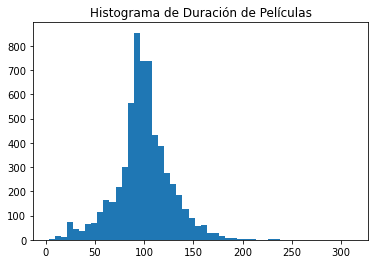

In [16]:
# Nuevos gráficos
import matplotlib.pyplot as plt
plt.title("Histograma de Duración de Películas")
plt.hist(duration_min_int, bins=50)
plt.show()


In [18]:
# De los resultados obtenidos surgen las siguientes preguntas:
# ¿qué películas corresponden a la más corta y más larga?
# Tip: buscar por "3 min" y "312 min" en la base de datos original (no la de duraciones)-movies

# Filtro para la película de 3 min
filter_arr= (duration == "3 min")
print (filter_arr)
dur_array3min=movies[filter_arr]
print(dur_array3min)

[False False False ... False False False]
[['s3778' 'Movie' 'Silent' 'Limbert Fabian, Brandon Oldenburg' ''
  'United States' 'June 4, 2019' '2014' 'TV-Y' '3 min'
  'Children & Family Movies, Sci-Fi & Fantasy'
  '"Silent" is an animated short film created by Academy Award® winning Moonbot Studios. It celebrates how storytellers, inventors, and technology work together to create cinema magic.']]


In [19]:
# Filtro para la película de 312 min
filter_arr= (duration == "312 min")
print (filter_arr)
dur_array312min=movies[filter_arr]
print(dur_array312min)

[False False False ... False False False]
[['s4254' 'Movie' 'Black Mirror: Bandersnatch' ''
  'Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry'
  'United States' 'December 28, 2018' '2018' 'TV-MA' '312 min'
  'Dramas, International Movies, Sci-Fi & Fantasy'
  'In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.']]


In [20]:
# Para ver el nombre solamente de las películas se puede referir al campo de esta forma
# Los índices vienen del primer campo "s3778", que es un índice numérico
print(movies[3777][2])
print(movies[4253][2])


Silent
Black Mirror: Bandersnatch


#### Importando Funciones de Internet
* En esta sección, se verá cómo importar funciones de internet.
* Para este ejemplo se utilizó una función llamada "IMDbPY" http://www.geeksforgeeks.org/python-imdbpy-searching-a-movie/.
* IMBD es una base de datos digital enorme de información de películas.
* La librería trae información de IMDB - una de las librerías públicas

#### Instalación de la librería en nuestro entrono

* En muchas ocasiones tendremos que instalar nuevas librerías, y eso se lo hace utilizando el "terminal" desde VS Code

In [21]:
# Importando funciones de la web
# https://www.geeksforgeeks.org/python-imdbpy-searching-a-movie/
# Usando IMDbPY

# importando el módulo
import imdb
# creando una instancia de IMDb
ia = imdb.IMDb()
# busca el nombre de la película correspondiente a la más corta (s3778) y más larga (s4254)
name= movies[4253][2]
# busca la película
search = ia.search_movie(name)
# se imprime el resultado
for i in search:
    print(i)


Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror - Bandersnatch
Black Mirror Bandersnatch
Black Mirror: Bandersnatch - Spoilercast
43 - Black Mirror: Bandersnatch (2018)
Bird Box/Black Mirror: Bandersnatch
DR228: Black Mirror: Bandersnatch and The Masked Singer
AFL Season 2020 Round 6 - The Black Mirror Bandersnatch Special
Star Wars Park - X-Men & The MCU - Black Mirror: Bandersnatch
Choose Your Own Adventure: Customer Service Experience (Black Mirror Bandersnatch Parody)
Black Mirror: Bandersnatch Izleme Deneyiminde Bir Devrim mi? - Yeni Sezon Gelmis mi? 1
'Siamo serie": Alla scoperta di Black Mirror: Bandersnatch, After Yang e The Sound of 007.
Black Mirror's Bandersnatch... Any Good?
Black Mirror: Bandersnach - Final Thoughts & Can This Ever Work Again?
Coding for the ZX Spectrum and Netflix/Black Mirror's Bandersnach with Matt Westcott


In [22]:
# busca el nombre de la película correspondiente a la más corta (s3778) y más larga (s4254)
name= movies[4253][2]
# busca la película
search = ia.search_movie(name)
# se imprime el resultado
for i in search:
    print(i)

Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror: Bandersnatch
Black Mirror - Bandersnatch
Black Mirror Bandersnatch
Black Mirror: Bandersnatch - Spoilercast
43 - Black Mirror: Bandersnatch (2018)
Bird Box/Black Mirror: Bandersnatch
DR228: Black Mirror: Bandersnatch and The Masked Singer
AFL Season 2020 Round 6 - The Black Mirror Bandersnatch Special
Star Wars Park - X-Men & The MCU - Black Mirror: Bandersnatch
Choose Your Own Adventure: Customer Service Experience (Black Mirror Bandersnatch Parody)
Black Mirror: Bandersnatch Izleme Deneyiminde Bir Devrim mi? - Yeni Sezon Gelmis mi? 1
'Siamo serie": Alla scoperta di Black Mirror: Bandersnatch, After Yang e The Sound of 007.
Black Mirror's Bandersnatch... Any Good?
Black Mirror: Bandersnach - Final Thoughts & Can This Ever Work Again?
Coding for the ZX Spectrum and Netflix/Black Mirror's Bandersnach with Matt Westcott


In [ ]:
# Los resultados traen películas que tienen nombres similares
# la librería permite hacer muchas más cosas y en su documentación (internet) se invita a explorarla

In [23]:
# Ejemplo de lo anterior
from imdb import Cinemagoer

# create an instance of the Cinemagoer class
ia = Cinemagoer()

# get a movie and print its director(s)
the_matrix = ia.get_movie('0133093')
for director in the_matrix['directors']:
    print(director['name'])

# show all information that are currently available for a movie
print(sorted(the_matrix.keys()))

# show all information sets that can be fetched for a movie
print(ia.get_movie_infoset())

# update a Movie object with more information
ia.update(the_matrix, ['technical'])
# show which keys were added by the information set
print(the_matrix.infoset2keys['technical'])
# print one of the new keys
print(the_matrix.get('tech'))

Lana Wachowski
Lilly Wachowski
['akas', 'animation department', 'art department', 'art direction', 'aspect ratio', 'assistant director', 'box office', 'camera and electrical department', 'canonical title', 'cast', 'casting department', 'casting director', 'certificates', 'cinematographer', 'color info', 'composer', 'costume department', 'costume designer', 'countries', 'country codes', 'cover url', 'director', 'distributors', 'editor', 'editorial department', 'full-size cover url', 'genres', 'imdbID', 'kind', 'language codes', 'languages', 'localized title', 'location management', 'long imdb canonical title', 'long imdb title', 'make up', 'miscellaneous crew', 'music department', 'original air date', 'original title', 'other companies', 'plot outline', 'producer', 'production companies', 'production design', 'production manager', 'rating', 'runtimes', 'script department', 'set decoration', 'smart canonical title', 'smart long imdb canonical title', 'sound crew', 'sound mix', 'special e

#### Wrap up
* Se vieron las funcionalidades principales de importar librerías completas (módulos) y sus funciones/submódulos individuales
* Se generó una importación simple de un archivo CSV
* Se generó una exploración inicial acerca del manejo estadístico con Numpy
* Se instaló una librería utilizando "pip install"
* Se descargó una librería desde la web para ver información de películas (IMDB) y además se le hicieron algunas consultas para entender su funcionamiento y la implementación de la misma en una aplicación propia